En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

¿Qué diferencia existe el error de tipo I y el error de tipo II?

¿Qué es la asimetría?

¿Es vuestra variable respuesta asimétrica?

¿Qué tipo de curtosis presenta vuestra variable respuesta?

¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DA-PROMO-B-MODULO3-SPRINT1-LUCIA_NATALIA/Datos/possum.csv", index_col=0)

In [3]:
mu, sigma = 0, 1 
datos_normales = np.random.normal(mu, sigma, 1000) # 1000 corresponde con el número de datos que vamos a generar. 
datos_normales[:20]

array([-0.37354166, -1.78504652,  2.03131261,  1.85737576, -0.17752798,
       -2.42434994, -0.29220266, -1.78147271, -0.88161602,  1.24852018,
       -0.35793298, -0.50733062, -0.8639953 ,  0.11443312, -1.44445315,
        1.48092509, -0.63708204,  0.78658175, -0.00773292,  0.66110624])

In [4]:
# vamos a generar también unos datos no normales para hacer comparaciones a lo largo de la lección

datos_no_normales = np.random.random(1000) 
datos_no_normales[:20]

array([0.791116  , 0.32887513, 0.31465811, 0.37584069, 0.2973213 ,
       0.95057781, 0.32443338, 0.37308397, 0.82767495, 0.37350082,
       0.56549111, 0.48077122, 0.6130332 , 0.80859569, 0.95621591,
       0.00258317, 0.31408445, 0.05565524, 0.42960569, 0.67948645])

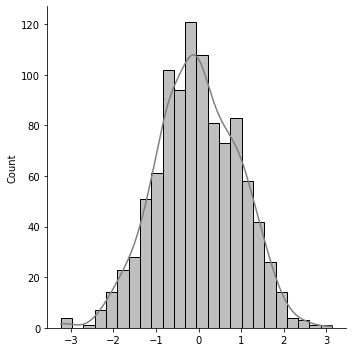

In [5]:
# graficamos los datos
sns.displot(datos_normales, kde = True, color = "grey");

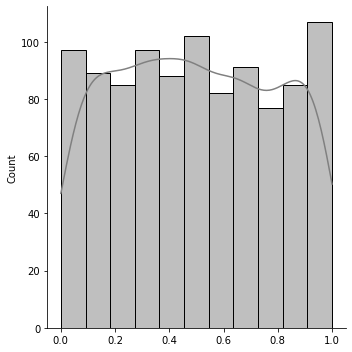

In [6]:
sns.displot(datos_no_normales, kde = True, color = "grey");

In [7]:
# seguiremos usando los mismos datos normales que creamos en el apartado anterior

print(datos_normales[:20])

[-0.37354166 -1.78504652  2.03131261  1.85737576 -0.17752798 -2.42434994
 -0.29220266 -1.78147271 -0.88161602  1.24852018 -0.35793298 -0.50733062
 -0.8639953   0.11443312 -1.44445315  1.48092509 -0.63708204  0.78658175
 -0.00773292  0.66110624]


/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


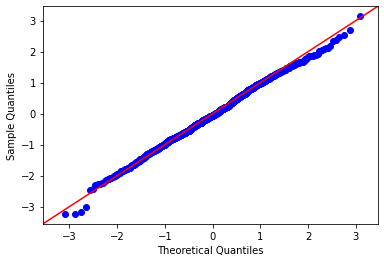

In [8]:
import statsmodels.api as sm

sm.qqplot(datos_normales, line ='45');

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


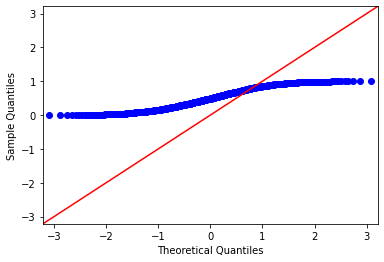

In [9]:
sm.qqplot(datos_no_normales, line ='45');

In [10]:
from scipy.stats import skew

In [11]:
# evaluemos como es la distribución de los datos

skew(datos_normales)

-0.053997174874909966

In [12]:
skew(datos_no_normales)

0.03399150493916833

In [13]:
# lo primero que vamos a hacer es convertir nuestro datos en un dataframe

diccionario = {"datos_normales": datos_normales, "datos_no_normales": datos_no_normales}

df = pd.DataFrame(diccionario)
df.head()

,datos_normales,datos_no_normales
0,-0.373542,0.791116
1,-1.785047,0.328875
2,2.031313,0.314658
3,1.857376,0.375841
4,-0.177528,0.297321


In [14]:
df["datos_normales"].skew()

-0.05407832618682235

In [15]:
df["datos_no_normales"].skew()

0.03404259011586656

In [16]:
# importamos la librería que necesitamos

from scipy.stats import kurtosistest

In [17]:
kurtosistest(datos_normales)

KurtosistestResult(statistic=-0.4105876083378449, pvalue=0.6813749515631511)

In [18]:
kurtosistest(datos_no_normales)

KurtosistestResult(statistic=-26.22281309265504, pvalue=1.4601156929936518e-151)

In [19]:
# para los datos normales

kurtosistest(df['datos_normales'])

KurtosistestResult(statistic=-0.4105876083378449, pvalue=0.6813749515631511)

In [20]:
# para los datos no normales

kurtosistest(df["datos_no_normales"])

KurtosistestResult(statistic=-26.22281309265504, pvalue=1.4601156929936518e-151)

In [21]:
from scipy import stats

stats.shapiro(df["datos_normales"])

ShapiroResult(statistic=0.9980247020721436, pvalue=0.2931349277496338)

In [22]:
stats.shapiro(df["datos_no_normales"])

ShapiroResult(statistic=0.9541120529174805, pvalue=3.9146484616472095e-17)

In [23]:
from scipy.stats import kstest

In [24]:
kstest(df["datos_normales"], 'norm')

KstestResult(statistic=0.03450170215662729, pvalue=0.18060755112268045)

In [25]:
kstest(df["datos_no_normales"], 'norm')

KstestResult(statistic=0.5001477137915041, pvalue=7.599897249333981e-232)